# Cliff Walking SAS

![title](cliff_walking_pic.png)

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import gym
import gym_cliffwalking

# Connect to CAS

In [2]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Make Environment

In [3]:
env = gym.make('cliffwalking-v0')

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['S' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' 'G']]


In [4]:
# Env Actions
directions = {"Up":0,"Down":1,"Left":2,"Right":3}
env.action_space

Discrete(4)

In [5]:
# Env Grid
env.observation_space

Box(0.0, 10.0, (2,), float32)

In [6]:
# Env Start
env.reset()

[3, 0]

In [7]:
# Take a Step
env.step(0)

([2, 0], -1, False, {})

# Create SAS RL Environment URL

In [8]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [9]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.406s, user: 0.717s, sys: 0.962s, mem: 0.255mb

# Train the Agent - Deep Q Networks

In [10]:
# results = conn.reinforcementLearn.rlTrainDqn(
    
#     # RL Arguments
#     environment=dict(type='remote', url=sasrl_env_url, name='cliffwalking-v0', render=False, seed=802),
#     exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
#     gamma = 0.99,
#     numEpisodes = 1000,
    
#     # NN Arguments
#     QModel=[{'type':'FC', 'n':16, 'act':'RELU'},
#             {'type':'FC', 'n':32, 'act':'RELU'}],
#     optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
#     minReplayMemory = 100,
#     maxReplayMemory = 1000,
#     targetUpdateInterval = 100,
    
#     # Test Arguments
#     testInterval = 10,
#     numTestEpisodes = 1,
    
#     # Other Arguments
#     modelOut=dict(name='dqn_weights', replace=True),
#     seed = 919
    
# )

# Save the Model

In [11]:
# Add a CASlib
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Save Optimization History
# pd.DataFrame(results["OptIterHistory"]).to_csv("D:/Workshop/Winsas/VOSI/cliff_walking_opthist.csv", index=False)

In [13]:
# Save DQN Weights
# conn.table.save(caslib = 'mycl', table = 'dqn_weights', name = 'cliff_walking_dqn_weights', replace = True)
# conn.table.attribute(caslib = 'CASUSER', table = 'cliff_walking_dqn_weights_attr', name = 'dqn_weights', task='convert')
# conn.table.save(caslib = 'mycl', table = 'cliff_walking_dqn_weights_attr', name = 'cliff_walking_dqn_weights_attr', replace = True)

# Load the Model

In [14]:
# Load Optimization History
results = pd.read_csv("D:/Workshop/Winsas/VOSI/cliff_walking_opthist.csv")

In [15]:
# Load DQN Weights
conn.table.loadTable(caslib = 'mycl', path="cliff_walking_dqn_weights.sashdat", casOut=dict(name="dqn_weights", replace=True))
conn.table.loadTable(caslib = 'mycl', path="cliff_walking_dqn_weights_attr.sashdat", casOut=dict(name="dqn_weights_attr", replace=True))
conn.table.attribute(caslib='CASUSER', task='ADD', name='dqn_weights', attrtable='dqn_weights_attr')

NOTE: Cloud Analytic Services made the file cliff_walking_dqn_weights.sashdat available as table DQN_WEIGHTS in caslib CASUSER(student).
NOTE: Cloud Analytic Services made the file cliff_walking_dqn_weights_attr.sashdat available as table DQN_WEIGHTS_ATTR in caslib CASUSER(student).


+ Elapsed: 0.0012s, user: 0.00105s, sys: 4.9e-05s, mem: 0.309mb

# View Results

In [16]:
results

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,-1.779888,-4.086676,303.490032,-200.0
1,10,28.369003,29.614129,39.170274,-200.0
2,20,56.299245,55.676701,73.855397,-200.0
3,30,132.642502,131.581347,251.660035,-200.0
4,40,208.387048,209.130055,19.456306,-200.0
...,...,...,...,...,...
96,960,-7.972808,-7.964146,0.003167,-13.0
97,970,-7.630048,-7.622630,0.006180,-13.0
98,980,-12.826011,-12.800309,0.002172,-13.0
99,990,-10.288602,-10.283359,0.000451,-13.0


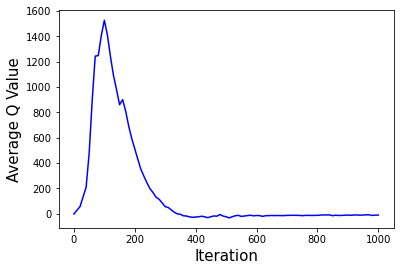

In [17]:
plt.plot(results['Iteration'],results['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

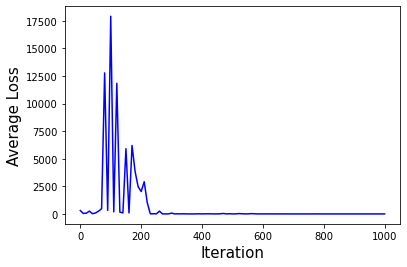

In [18]:
plt.plot(results['Iteration'],results['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

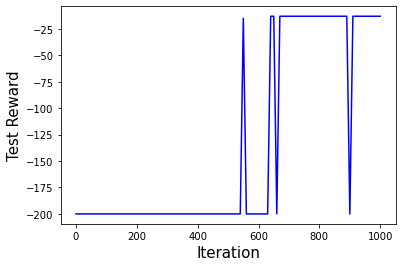

In [19]:
plt.plot(results['Iteration'],results['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [20]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='cliffwalking-v0', render=False),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=    -1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=    -2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=    -3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=    -4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=    -5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=    -6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=    -7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=    -8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=    -9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=   -10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=   -11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=   -12
         Episode=        1 S

,Property,Value
0,Number of State Variables,2
1,Number of Actions,4
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [21]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_Action_,_Reward_,_Done_
0,0.0,1.0,3.0,0.0,0.0,-1.0,0.0
1,1.0,1.0,2.0,0.0,3.0,-1.0,0.0
2,2.0,1.0,2.0,1.0,3.0,-1.0,0.0
3,3.0,1.0,2.0,2.0,3.0,-1.0,0.0
4,4.0,1.0,2.0,3.0,3.0,-1.0,0.0
5,5.0,1.0,2.0,4.0,3.0,-1.0,0.0
6,6.0,1.0,2.0,5.0,3.0,-1.0,0.0
7,7.0,1.0,2.0,6.0,3.0,-1.0,0.0
8,8.0,1.0,2.0,7.0,3.0,-1.0,0.0
9,9.0,1.0,2.0,8.0,3.0,-1.0,0.0


# Find Optimal Path

In [22]:
# Set Row and Column Arrays
state_x = np.array(df["_State_0"], dtype="i")
state_y = np.array(df["_State_1"], dtype="i")

#Initialize Grid
grid = np.full((4, 12), "-")
grid[3,0] = "S"
grid[3,11] = "G"

# Mark the Agent's Path
for i in range(df.shape[0]-1):
    grid[state_x[i+1],state_y[i+1]] = "A"

# Print Optimal Path
print(grid)

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
 ['S' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' 'G']]


# End the Session

In [23]:
conn.session.endSession()

+ Elapsed: 0.000562s, user: 0.00055s, mem: 0.221mb